# Title: Predicting Hotel Reservation Cancelations

## Authors: Pontus Filén, Alexander Kazakov, Emil Cromnier, Alexander Gemal

---

### Background and motivation

Due to the evolution of technology, more and more hotels use websites to allow customers to make hotel reservations. This also means that it is much easier to cancel a reservation. We are trying to predict whether a customer will cancel their reservation or not depending on certain factors, such as previous cancellations, number of children, type of meal plan and more.
This could be interesting and helpful to hotels to save money by knowing more exactly how many rooms are available for other costumers. It's interesting to see how much machine learning can help both small and big business to save money and optimize their business.

The goal of our project is to try to predict whether or not a customer will cancel their reservation.

### Dataset

Dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset



The Hotel Reservations Dataset contains data that helps to classify if a customer is going to cancel their room reservation. To helps with this there are numerous features in the dataset which are related to the customers reservation and are as follows:


*   Number of adults
*   Number of children
*   Number of weekend nights
*   Number of week nights
*   Required parking space
*   Lead time (The time between booking date and arrival date)
*   Arrival year
*   Arrival month
*   Arrival date
*   Repeated guest
*   Number of previous cancellations
*   Number of previous bookings not canceled
*   Average price per room
*   Number of special requests
*   Type of meal plan
*   Room type reserved
*   Market segment type







The last three are categorical while the rest are numerical. The time period for when each reservation was made are between 2017 and 2018.

In total there are 36275 cases, 67% were not cancelled while 33% of the reservations were cancelled. Since this dataset is not that balanced accuracy will not be a good metric for evaluation since it is impacted by the imbalance in the dataset

##Methodology ##


The problem to solve is to identify whether a reservations is going to be cancelled or not and thus it becomes a classification problem.

Our work consisted of three primary stages:


*   **Analysis of the data**
*   **Execution**
*   **Evaluation**



To be more efficient through this project we split the work between different group members

In this project the main evaluation metrics of interest will be Recall and precision. This is because we don't want the hotel to cancel a reservation because of the prediction and then realize that the guest would arrive anyway.

Precision is a metric that answers the question "What proportions of positive identifications was actually correct?".
In other words the precision is calculated by
True Positives/(True Positives + False Positives)

Recall is a metric that answers the question "What proportion of actual positives was identified correctly?"
In other words the recall is calculated by
True positives/(True Positives + False Negatives)

Of the two metrics the precision metric is of higher importance for the project.


#Load dataset

In this first part we will load in all the data. We will also sort out all the categorical and numerical data to keep them separate later in the project. We also print all columns and there values in order to gain some insight on the features

In [ ]:
#import relevent libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import matplotlib.cm as plts
import matplotlib.pyplot as plt
import numpy as np
#load the data and drop Booking_ID feature
data = pd.read_csv('Hotel Reservations.csv',sep=',')
data.drop("Booking_ID", axis=1)
#split our data into categorical and numerical features
data["booking_status"] = data["booking_status"].fillna('Not_Canceled') #default empty values to not canceled
columns_numerical = ["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "required_car_parking_space", "lead_time",
                     "arrival_year", "arrival_month", "arrival_date", "repeated_guest","no_of_previous_cancellations", "no_of_previous_bookings_not_canceled",
                     "avg_price_per_room", "no_of_special_requests"]

columns_categorical = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]


# Analyze the data

**Correlation Matrix**

We decided to, first of all, make and take a look at a correlation matrix containing all the features, categorical and numerical. We encode the dataframe and then show the correlation matrix.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#inspired by lab 5
# we need to first encode the categorical columns
data_encoded = pd.DataFrame()
for col in columns_categorical:
  LE = LabelEncoder()
  dt = LE.fit_transform(data[col])
  data_encoded[col] = dt

# combine with the numerical columns
for col in columns_numerical:
  data_encoded[col] = data[col]

# add in the encoded class column
LE = LabelEncoder()
data_encoded['booking_status'] = LE.fit_transform(data['booking_status'])

data_encoded.fillna('0')  #just in case of failed encoding

corr = data_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type_of_meal_plan,1.000000,-0.209176,0.203361,0.025555,-0.086764,-0.027327,-0.083431,-0.012991,-0.060271,0.071396,0.008564,0.004833,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706
room_type_reserved,-0.209176,1.000000,0.156610,0.270348,0.364073,0.057368,0.094125,0.038778,-0.107793,0.103369,-0.005967,0.032919,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986
market_segment_type,0.203361,0.156610,1.000000,0.314103,0.130618,0.129069,0.112952,-0.003723,-0.006933,0.150027,-0.006311,0.011649,-0.337763,-0.074229,-0.207149,0.375649,0.308484,-0.136008
no_of_adults,0.025555,0.270348,0.314103,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,-0.086764,0.364073,0.130618,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,-0.027327,0.057368,0.129069,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,-0.083431,0.094125,0.112952,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996
required_car_parking_space,-0.012991,0.038778,-0.003723,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185
lead_time,-0.060271,-0.107793,-0.006933,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,0.071396,0.103369,0.150027,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529


From our correlation matrix we can observe a couple of interesting correlations:



*   **repeated_guest and no_of_previous_bookings_not_canceled	have a positve correlation of 0.468147**

*   **avg_price_per_room and room_type_reserved has a positive correlation of 0.469899**


*   **repeated_guest and no_of_previous_bookings_not_canceled also has a positive correlation of 0.5391**
*   **Booking_status and lead_time has a negative correlation of -0.438538**
This would mean that the longer the time is between the booking and arrival date the more likely it is for the room to be canceled

*   **Arrival month and arrival year has a negative correlation of -0.339689**

*   **Booking status and Number of special requests has a positive correlation of 0.253070**
This would mean that if you have more special requests you are a little bit more likely to cancel the reservation








While this gives some perspective to how each feature are correlated to each other we need to analys the data further with different methods


##Histogram plotting

**We can plot histogram to see how each feature is distributed**. We plot both categorical and numerical as seperate cells.

------Categorical-------


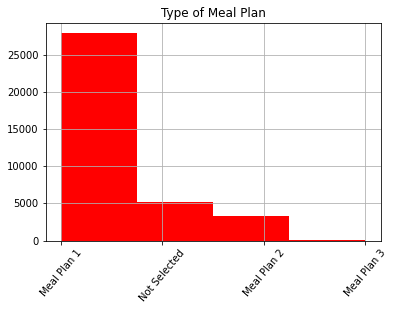

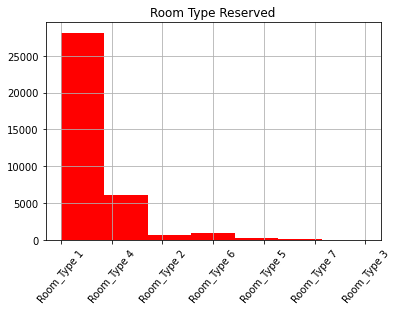

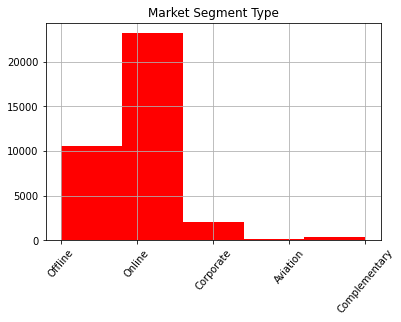

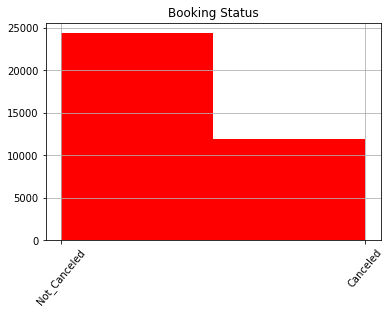

In [ ]:
print("------Categorical-------")
# plots histogram for each categorical feature.
hist2 = data['type_of_meal_plan'].hist(bins=4, color='red')
plt.title("Type of Meal Plan")
plt.xticks(ticks = range(4), rotation=50)
plt.show()

hist2 = data['room_type_reserved'].hist(bins=7, color='red')
plt.title("Room Type Reserved")
plt.xticks(ticks = range(7), rotation=50)
plt.show()

hist2 = data['market_segment_type'].hist(bins=5, color='red')
plt.title("Market Segment Type")
plt.xticks(ticks = range(5), rotation=50)
plt.show()

hist2 = data['booking_status'].hist(bins=2, color='red')
plt.title("Booking Status")
plt.xticks(ticks = range(2), rotation=50)
plt.show()




-------Numerical-------


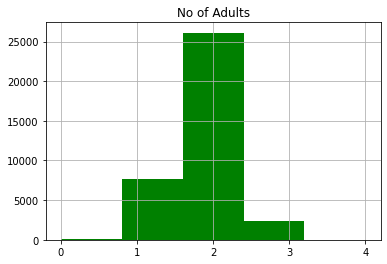

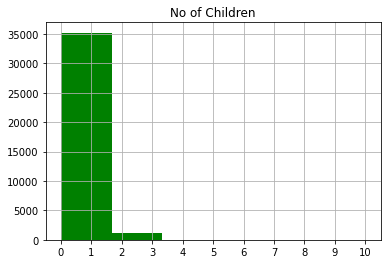

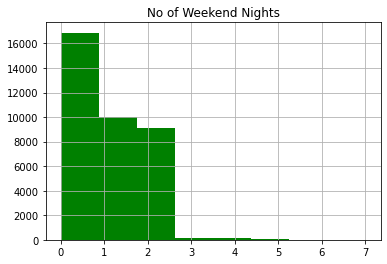

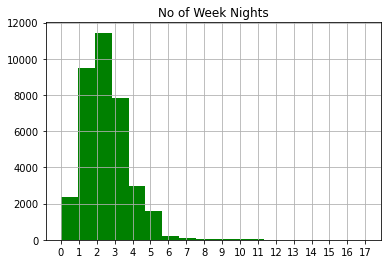

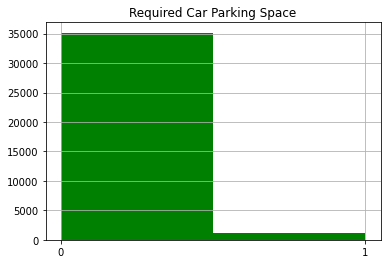

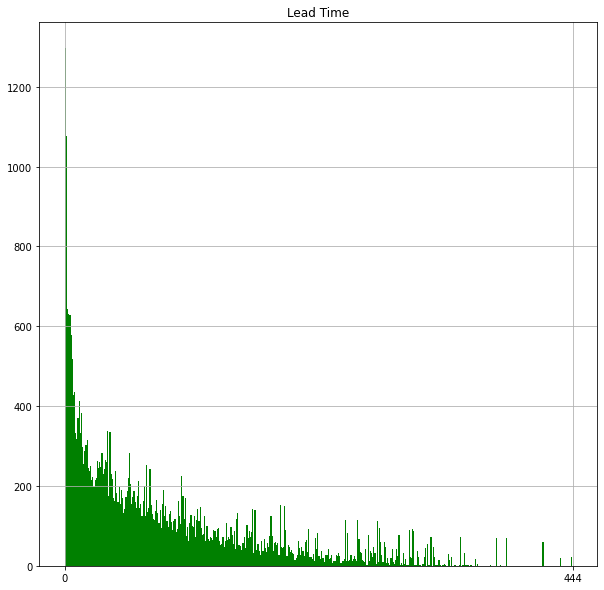

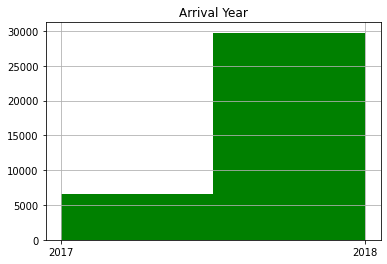

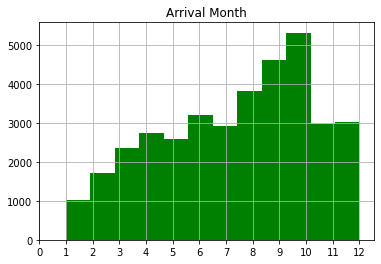

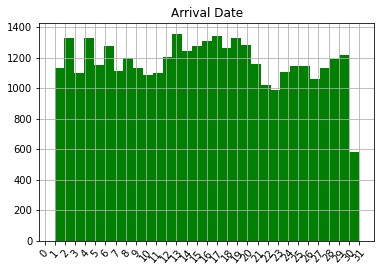

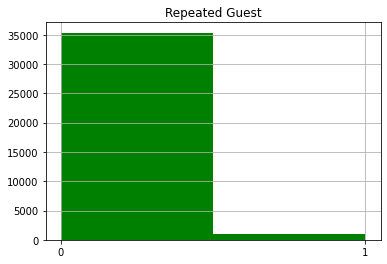

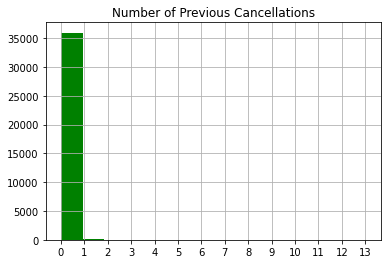

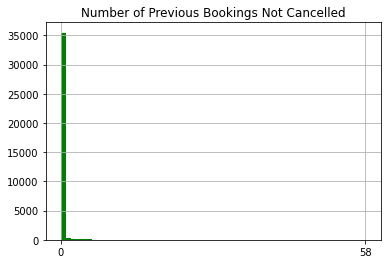

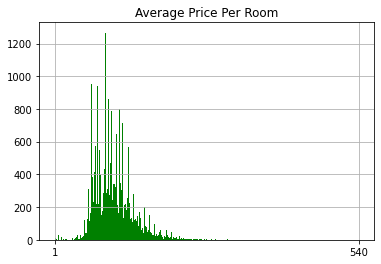

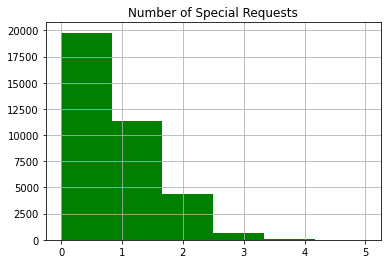

In [ ]:
print("-------Numerical-------")
# plots histogram for each numerical feature.

hist2 = data['no_of_adults'].hist(bins=5, color='green')
plt.title("No of Adults")
plt.xticks(ticks = range(5), rotation=0)
plt.show()

hist2 = data['no_of_children'].hist(bins=6, color='green')
plt.title("No of Children")
plt.xticks(ticks = range(11), rotation=0)
plt.show()

hist2 = data['no_of_weekend_nights'].hist(bins=8, color='green')
plt.title("No of Weekend Nights")
plt.xticks(ticks = range(8), rotation=0)
plt.show()

hist2 = data['no_of_week_nights'].hist(bins=18, color='green')
plt.title("No of Week Nights")
plt.xticks(ticks = range(18), rotation=0)
plt.show()

hist2 = data['required_car_parking_space'].hist(bins=2, color='green')
plt.title("Required Car Parking Space")
plt.xticks(ticks = range(2), rotation=0)
plt.show()

fig,ax = plt.subplots(figsize=(10,10))
plt.grid()
hist_Ltime = data['lead_time'].hist(bins=444 ,color='green')
plt.title("Lead Time")
plt.xticks(ticks = [0, 444], rotation=0)
plt.show()

hist_year = data['arrival_year'].hist(bins=2, color='green')
plt.title("Arrival Year")
plt.xticks(ticks = [2017,2018], rotation=0)
plt.show()

hist_month = data['arrival_month'].hist(bins=12, color='green')
plt.title("Arrival Month")
plt.xticks(ticks = range(13), rotation=0)
plt.show()

hist_date = data['arrival_date'].hist(bins=31, color='green')
plt.title("Arrival Date")
plt.xticks(ticks = range(32), rotation=50)
plt.show()

hist_repeated_guest = data['repeated_guest'].hist(bins=2, color='green')
plt.title("Repeated Guest")
plt.xticks(ticks = range(2), rotation=0)
plt.show()

hist_no_of_previous_cancellations = data['no_of_previous_cancellations'].hist(bins=14, color='green')
plt.title("Number of Previous Cancellations")
plt.xticks(ticks = range(14), rotation=0)
plt.show()

hist_no_of_previous_bookings_not_canceled = data['no_of_previous_bookings_not_canceled'].hist(bins=59, color='green')
plt.title("Number of Previous Bookings Not Cancelled")
plt.xticks(ticks = [0, 58], rotation=0)
plt.show()

plt.grid()
hist_avg_price_per_room = data['avg_price_per_room'].hist(bins=540, color='green')
plt.title("Average Price Per Room")
plt.xticks(ticks = [1, 540], rotation=0)
plt.show()

hist_no_of_special_requests = data['no_of_special_requests'].hist(bins=6, color='green')
plt.title("Number of Special Requests")
plt.xticks(ticks = range(6), rotation=0)
plt.show()




##Histogram data Analysis:

Based on our histograms it seems that the hotel could be more oriented towards business than vacational. This is based on the fact that there are many reservations with plenty of lead time and a low number of children in most cases. Furthermore the hotel has a low number of repeated guests, a low number of week nights and a high number of visitors choosing no meal plan.

Many people tend to take vacation during a weekend since they work during the week.


##PCA
We are going to use Principal Component Analysis (PCA) to analyze the data further.
#Eigen vector analys

We investigate the users further using eigenvectors.

Percent of variation in first two eigenvector: 98.90%


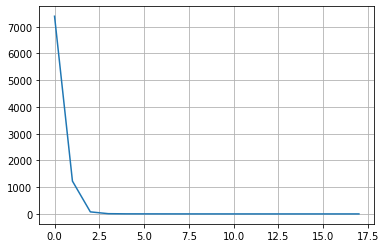

In [ ]:
from numpy.linalg import eig
from matplotlib.pyplot import figure
#compute covarince matrix
cov_m = data_encoded.cov()
#compute eigen values and vectors
eig_vals, eig_vecs = eig(cov_m)
#from lectures
print('Percent of variation in first two eigenvector: {0:2.2f}%'.format(
    100*(eig_vals[0]+eig_vals[1])/eig_vals.sum()))
fig, ax = plt.subplots()
ax.plot(eig_vals)
ax.grid()
plt.show()


We can see that 98% of the variance are contained in two of the dimensions


We plot the corresponding eigen vectors

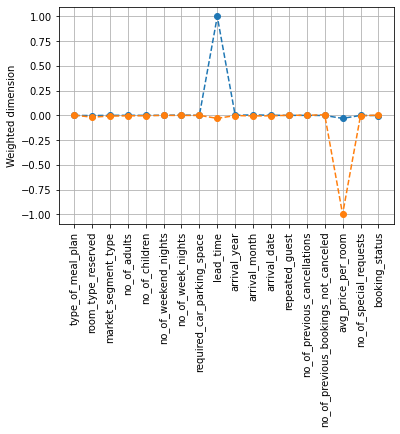

In [ ]:
fig, ax = plt.subplots()
#Plot the eigen vectors
ax.plot(eig_vecs[:,0],"o--")
ax.plot(eig_vecs[:,1],"o--")
plt.xticks(ticks = range(18), labels=data_encoded, rotation=90)
plt.ylabel('Weighted dimension')
ax.grid()
plt.show()





We can see that lead time and the average price for a room is a significant factor for these two dimensions. This should imply that they are important features in order to solve our problem.

## Plot mean-centered data

We project the mean centered observations of the dataset onto the two eigenvectors and perform a scatterplot

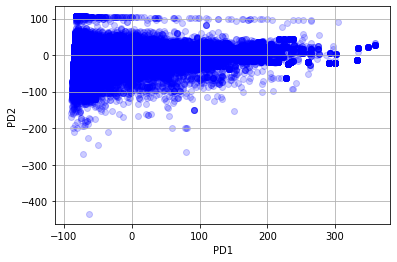

In [ ]:
#we center the data and scatterplots the projection
data_centered = data_encoded - data_encoded.mean()
proj = np.matmul(eig_vecs.T, data_centered.T).T
fig = plt.figure(); ax = fig.add_subplot(111)
scat = ax.scatter(proj[0], proj[1],alpha=0.2, c='blue')

plt.xlabel('PD1')
plt.ylabel('PD2')

plt.grid()
plt.show()

##Feature vector plot

We create a feature plot of all the users in the first principal direction between [-100,320] and the second principal direction between [60,150]
This corresponds to the area in the red rectangle below.

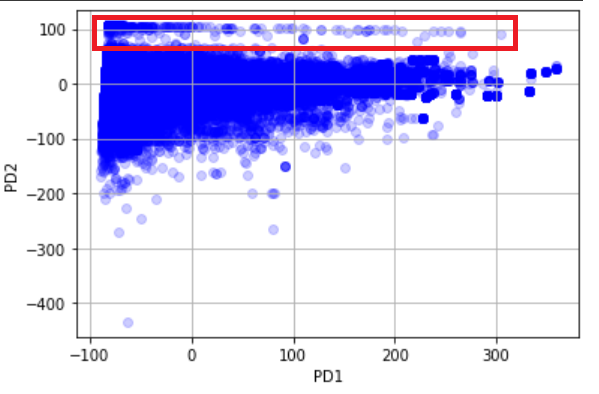

Each users feature vector are plotted.

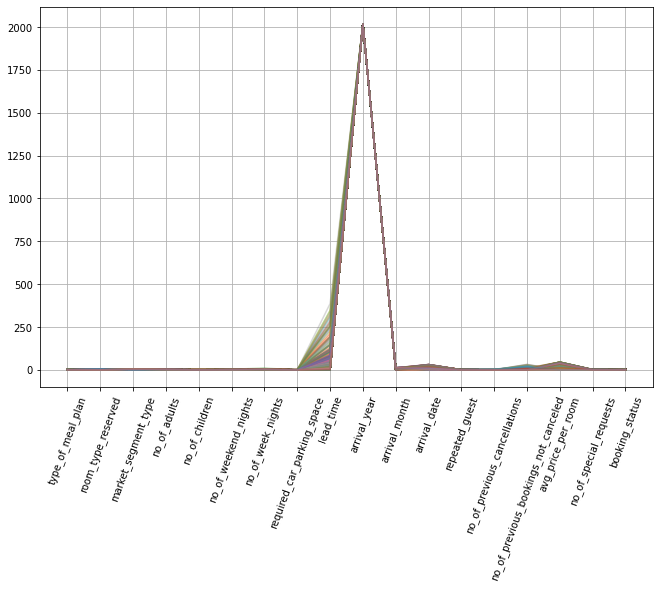

In [ ]:
#Define the area which the datapoints are within
pdlx = np.where((proj[0] > -100) & (proj[0] < 320)
 & (proj[1] > 60) & (proj[1] < 150))
#locate all points
data_subset = data_encoded.iloc[pdlx[0]]
#plot points and their destinations
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(data_subset.T, alpha=0.3)
plt.xticks(rotation=70)
plt.grid()
plt.show()

The vectors are a bit hard to intepret since arrival years and the lead time value are alot higher than the rest of the features.

Thus we remove them in order to make the vectors easier to intepret.

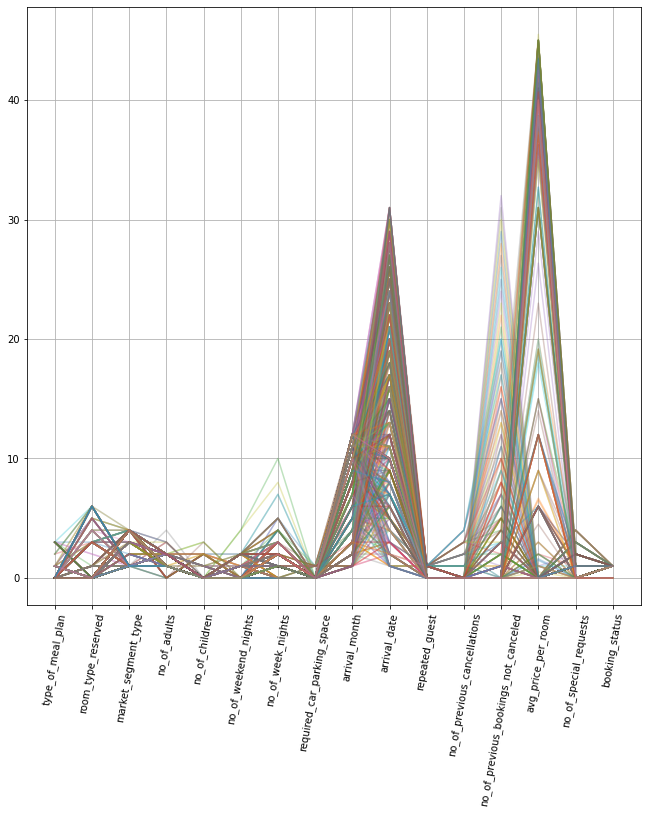

In [ ]:
#drop the arrival_year and lead_time features.
data_encoded_drop_year = data_encoded.drop("arrival_year", axis =1)
data_encoded_drop_time = data_encoded_drop_year.drop("lead_time", axis=1)

cov_m_test = data_encoded_drop_year.cov()
#compute eigen values and vectors
eig_vals_test, eig_vecs_test = eig(cov_m_test)
#centers the data and perform a projection
data_centered_test = data_encoded_drop_year - data_encoded_drop_year.mean()
data_meancenteredProj = np.matmul(eig_vecs_test.T, data_centered_test.T).T
#takes the users within given area.
pdlx = np.where((data_meancenteredProj[0] > -100) & (data_meancenteredProj[0] < 320)
 & (data_meancenteredProj[1] > 60) & (data_meancenteredProj[1] < 150))
#locate all points
data_subset_test = data_encoded_drop_time.iloc[pdlx[0]]

#plot points and their destinations

fig, ax = plt.subplots(figsize=(11,11))
ax.plot(data_subset_test.T, alpha=0.3)
plt.xticks(rotation=80)
plt.grid()
plt.show()


#required car space, lead time och week nights är de som måste bort

# Clustering
At first glance there seems to be no clear clusters or simaliar  behaviour in this group when observing the feature vectors. Let's see if there are any potential clusters. We test using k = 5 as a startingpoint

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


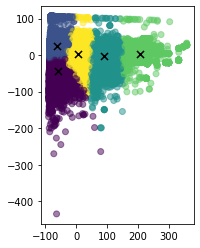

In [ ]:
from sklearn.cluster import KMeans
#performs a k means clusering and plots it.
K = 5
kmeans = KMeans(n_clusters=K)
kmeans.fit(proj)
#perform a scatterplot
plt.subplot(122);plt.scatter(proj[0],proj[1],alpha=0.5,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=50,c='black',marker='x')
plt.show()

**Lets evaluate what the optimal number of clusters are**
In this case we will use the silhouette score to find the best value of K (amount of clusters). The Silhouette score is a way to evaluate how good a clustering is. The Silhouette score ranges from -1 to 1 - where 1 is the best value. In other words, the value of K that gives us the greatest Silhouette value is the optimal amount of clusters.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


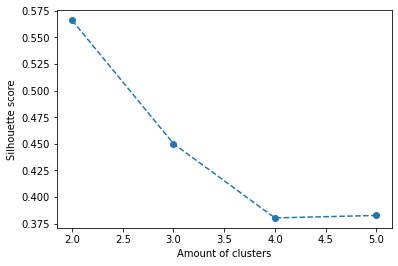

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Set boundaries for loop
Kmax = 5
k_array = []
# Do Kmeans clustering for all values of K and evaluate the silhouette score
for K in np.arange(2,Kmax+1, step=1):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit_predict(proj)
    score = silhouette_score(proj, kmeans.labels_)
    k_array.append(score)

# Plot the silhouette scores
fig, ax = plt.subplots()
plt.xlabel('Amount of clusters')
plt.ylabel("Silhouette score")
plt.plot(np.arange(2, Kmax+1, step=1),k_array, 'o--')
plt.show()


**Make new clustering with K = 2**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


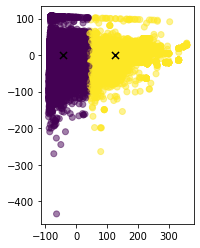

In [ ]:
K = 2
#instantiate and fit kmeans clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(proj)
#plots the clustering
plt.subplot(122);plt.scatter(proj[0],proj[1],alpha=0.5,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=50,c='black',marker='x')
plt.show()

We can see that the Kmeans clustering algorithm has created two clusters, however those does not really seem to be "real" clusters. Our conclusion from this, and the previous feature vector analysis, is that there are no clear clusters here.

#Classifiying

After analysing  and understanding the data we shall now try some classifiers inorder to solve our problem.

We start using KNN.

## Train KNN on all features

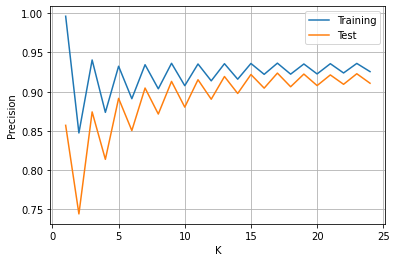

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score

#put dataset data and target into variables
X = data_encoded.drop("booking_status", axis=1).fillna(0)
Y = data_encoded["booking_status"]  #booking status is the feature we are basing the entire project on
#1 = not cancelled, 0 = Cancelled

# 70/30 train, test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


prec_train = []
prec_test = []

K = range(1, 25, 1) #range of "K" nearest neighbours
for kk in K:
    clf = KNeighborsClassifier(n_neighbors=kk)
    clf.fit(X_train, y_train)   #train
    pred_val = clf.predict(X_test)
    pred_train = clf.predict(X_train)
    prec_train.append(precision_score(pred_train,y_train))  #store accuracy for training set
    prec_test.append(precision_score(pred_val,y_test)) #store validation set acurracy

#plotting of training and testing accuracy graphs
fig, ax = plt.subplots()
plt.plot(K,prec_train)
plt.plot(K,prec_test)
plt.xlabel('K')
plt.ylabel('Precision')
plt.legend(['Training','Test'])
plt.grid()
plt.show()



**Conclusion**
We can see that the best value of K seems to be around 13


In [ ]:
from sklearn.metrics import accuracy_score
# create a K neighborssclassifier using k = 13
clf = KNeighborsClassifier(n_neighbors=13)
#train the Kneighbor
clf.fit(X_train, y_train)   #train
pred = clf.predict(X_test)

#prints accuracy score and classification report
acc = accuracy_score(pred, y_test)
print(classification_report(y_test, pred,target_names = LE.classes_))

              precision    recall  f1-score   support

    Canceled       0.77      0.57      0.65      3522
Not_Canceled       0.82      0.92      0.86      7361

    accuracy                           0.81     10883
   macro avg       0.79      0.74      0.76     10883
weighted avg       0.80      0.81      0.80     10883



## Classifying using Naive Bayes


We also try using Naive bayes to see if the results are any different.

In [ ]:
# add your code below
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score

X_num = data_encoded.drop(columns_categorical, axis=1).drop("booking_status", axis=1)
X_cat = data_encoded.drop(columns_numerical, axis=1).drop("booking_status", axis=1)
y = data_encoded["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7) #Create train/test split 70/30

# Create an instance and train the gaussian model
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train[columns_numerical], y_train)
# Create an instance and train the categorical model
nb_categorical = CategoricalNB()
nb_categorical.fit(X_train[columns_categorical], y_train)


#predict the log probabilities for the different models
probgauss = nb_gaussian.predict_log_proba(X_test[columns_numerical])
probcat = nb_categorical.predict_log_proba(X_test[columns_categorical])

prob_class1 = sum(0==data_encoded['booking_status'])/data_encoded.shape[0]
prob_class2 = sum(1==data_encoded['booking_status'])/data_encoded.shape[0]


#add the log probabilities together
total_log_prob = probgauss + probcat + np.log([prob_class1,prob_class2])

#predict that largest value of class >50K
new_y_pred = total_log_prob.argmax(axis=1)

print(classification_report(y_test, new_y_pred,target_names = LE.classes_))

              precision    recall  f1-score   support

    Canceled       0.40      0.96      0.57      3619
Not_Canceled       0.94      0.30      0.45      7264

    accuracy                           0.52     10883
   macro avg       0.67      0.63      0.51     10883
weighted avg       0.76      0.52      0.49     10883



From this we can see that we got a very high recall on the Canceled class which good, however precision would be more intresting in our case. We did also get a very low precision of canceled reservations which is not a trade we are willing to do. This is why we in the end have decided to not  use the Naive Bayes classifier for this problem

## Classification using Support Vector Machines (SVM)

**Support Vector Machines** are supervised learning methods. They are generally pretty effective in high dimensional spaces which would be benefitial for our dataset. Below we try 3 different SVM classifiers

In [ ]:
from sklearn.svm import SVC #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.linear_model import SGDClassifier  #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
from sklearn.svm import LinearSVC #https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
#Original SVM (Not recommended with large datasets since the fit time squares quadratically with number of samples.)
#Thus the linear versions should be a better choice for our dataset.

svcclf = SVC()
svcclf.fit(X_train, y_train)
pred = svcclf.predict(X_test)
print("Original SVM: \n")
print(classification_report(y_test, pred,target_names = LE.classes_))
#SGDClassifier

svcclf = SGDClassifier()
svcclf.fit(X_train, y_train)
pred = svcclf.predict(X_test)
print("SGD Classifier:\n")
print(classification_report(y_test, pred,target_names = LE.classes_))

#Linear Suppor Vector Classification
svcclf = LinearSVC()
svcclf.fit(X_train, y_train)
pred = svcclf.predict(X_test)
print("Linear SVM:\n")
print(classification_report(y_test, pred,target_names = LE.classes_))

Original SVM: 

              precision    recall  f1-score   support

    Canceled       0.76      0.41      0.54      3619
Not_Canceled       0.76      0.94      0.84      7264

    accuracy                           0.76     10883
   macro avg       0.76      0.67      0.69     10883
weighted avg       0.76      0.76      0.74     10883

SGD Classifier:

              precision    recall  f1-score   support

    Canceled       1.00      0.01      0.01      3619
Not_Canceled       0.67      1.00      0.80      7264

    accuracy                           0.67     10883
   macro avg       0.83      0.50      0.41     10883
weighted avg       0.78      0.67      0.54     10883

Linear SVM:

              precision    recall  f1-score   support

    Canceled       0.39      0.98      0.56      3619
Not_Canceled       0.97      0.23      0.37      7264

    accuracy                           0.48     10883
   macro avg       0.68      0.61      0.47     10883
weighted avg       0.77     

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Neither of these three types of SVM performed as well as we would like them to. Some of them acheived high precision or recall, but none managed to get a high score on both metrics at the same time. Let's explore one last classifier to see if that can yield better results

## Classification Using Random Forest Classifier
Finally we also try a new classifier to this course, the random forest classifier. The random forest classifier creates multiple decision trees that are then merged to get a more accurate prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from seaborn import barplot
#define the models and train the randomforest
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred, target_names = LE.classes_))
#plots what the randomforest classifier deemed to be the most important.
plot = barplot(model.feature_importances_, x=model.feature_importances_, y = model.feature_names_in_)
plot.set_title("Feature importances")




              precision    recall  f1-score   support

    Canceled       0.89      0.81      0.85      3619
Not_Canceled       0.91      0.95      0.93      7264

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



AttributeError: ignored

**The Random forest classifier** seems to be the best performing algorithm for our specific dataset and problem. We can see that we get a pretty high score on both the recall and the precision which is what we want.

We can also see that there are a lot of features above that seem to have very low importance to the classifier. As seen previously during the Principal component analysis 98% of the variance in the data were contained in two principal directions. This would mean that it would not make sense to select significantly more than two-five features moving forward. We will now perform some feature selection and train the Random forest classifier on only selected features and evaluate the results

## Feature Selection

## Chi2 feature selection

We test using the chi2 feature selection to see what features are the most relevant.

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

#Select the 5 best features using chi 2
X_five_feat = SelectKBest(chi2,k=5).fit(X_train,y_train)
#drop all other features and keeps the best
x_best_only = data_encoded[X_five_feat.get_feature_names_out()]
print(x_best_only)
#adds the five features as a list
Selected_feat_chi2 = ["lead_time","repeated_guest","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests"]


       lead_time  repeated_guest  no_of_previous_bookings_not_canceled  \
0            224               0                                     0   
1              5               0                                     0   
2              1               0                                     0   
3            211               0                                     0   
4             48               0                                     0   
...          ...             ...                                   ...   
36270         85               0                                     0   
36271        228               0                                     0   
36272        148               0                                     0   
36273         63               0                                     0   
36274        207               0                                     0   

       avg_price_per_room  no_of_special_requests  
0                   65.00                       0  
1      

### Chi scatter matrix plot of selected features

Create a scatter matrix plot of the chi2s features.

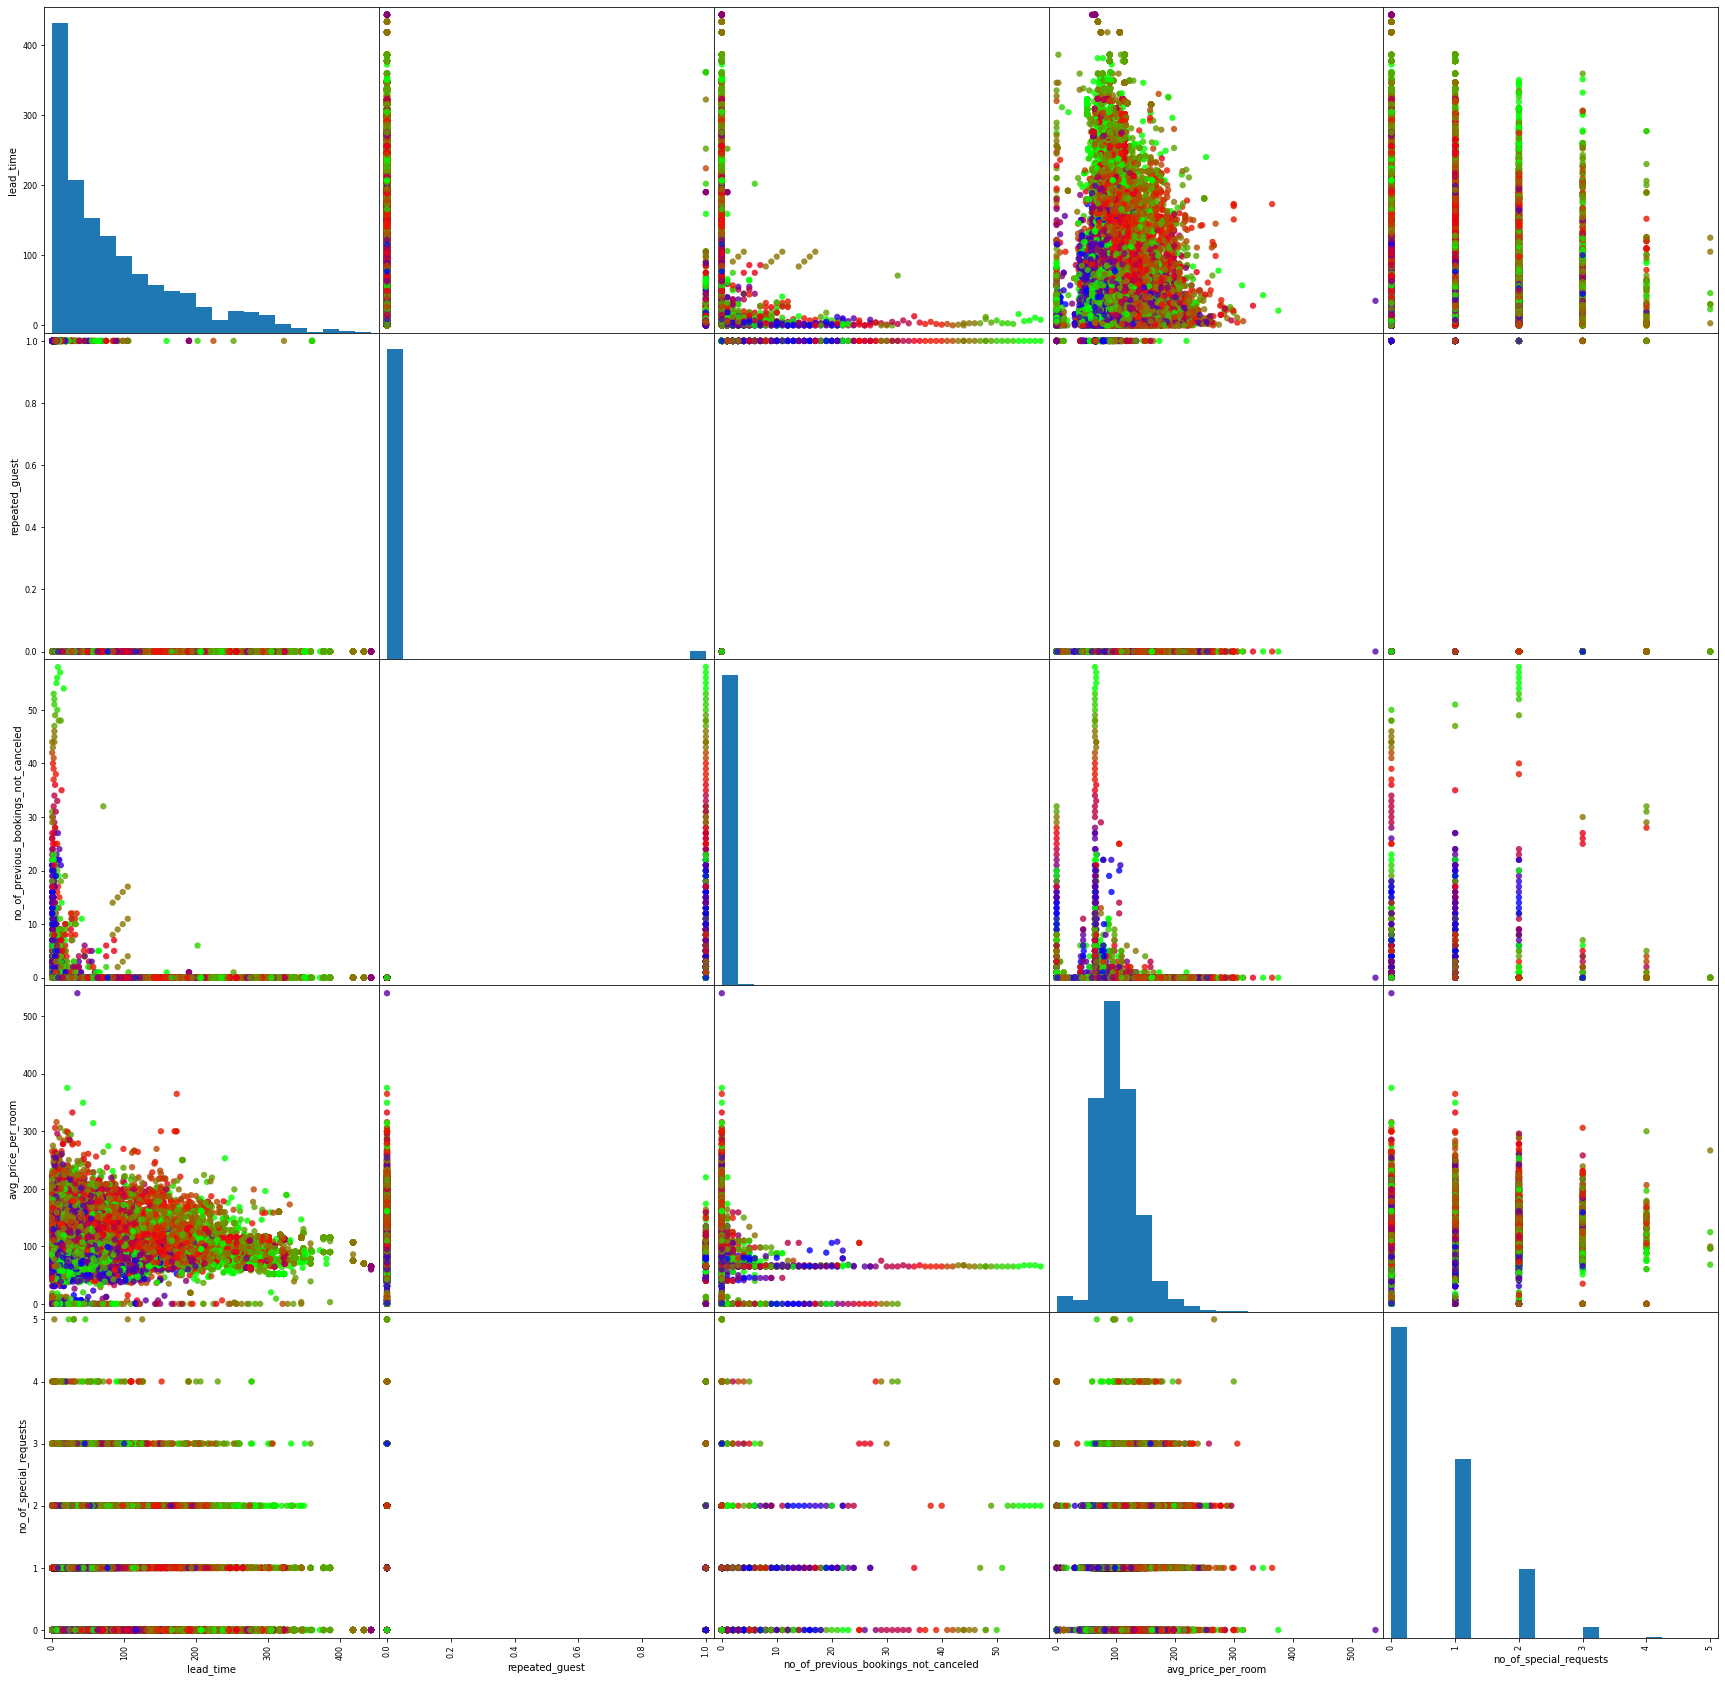

In [ ]:
pd.plotting.scatter_matrix(data_encoded[Selected_feat_chi2], c = data_encoded["arrival_month"], figsize=(30, 30),marker='o', hist_kwds={'bins': 20}, s=40,alpha=.8, cmap=plt.cm.brg, label=list(Selected_feat_chi2))
plt.show()



##Random Forest feature selection

We test using the Random Forest feature selection to see what features are the most relevant.

In [ ]:

#Train the randomforest feature selection on the training set
RF = RandomForestClassifier(n_estimators=19,random_state = 0)
selection = SelectFromModel(RF)
selection.fit(X_train,y_train)
print(X_train.columns[(selection.get_support())])
#adds the selected features to a list
Selected_feat_RF_train = ["lead_time", "arrival_month", "arrival_date", "avg_price_per_room", "no_of_special_requests"]



Index(['lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


### Randomforest scatter matrix plot of selected features
Create a scatter matrix plot of the randomforest features for both the validation and training set.

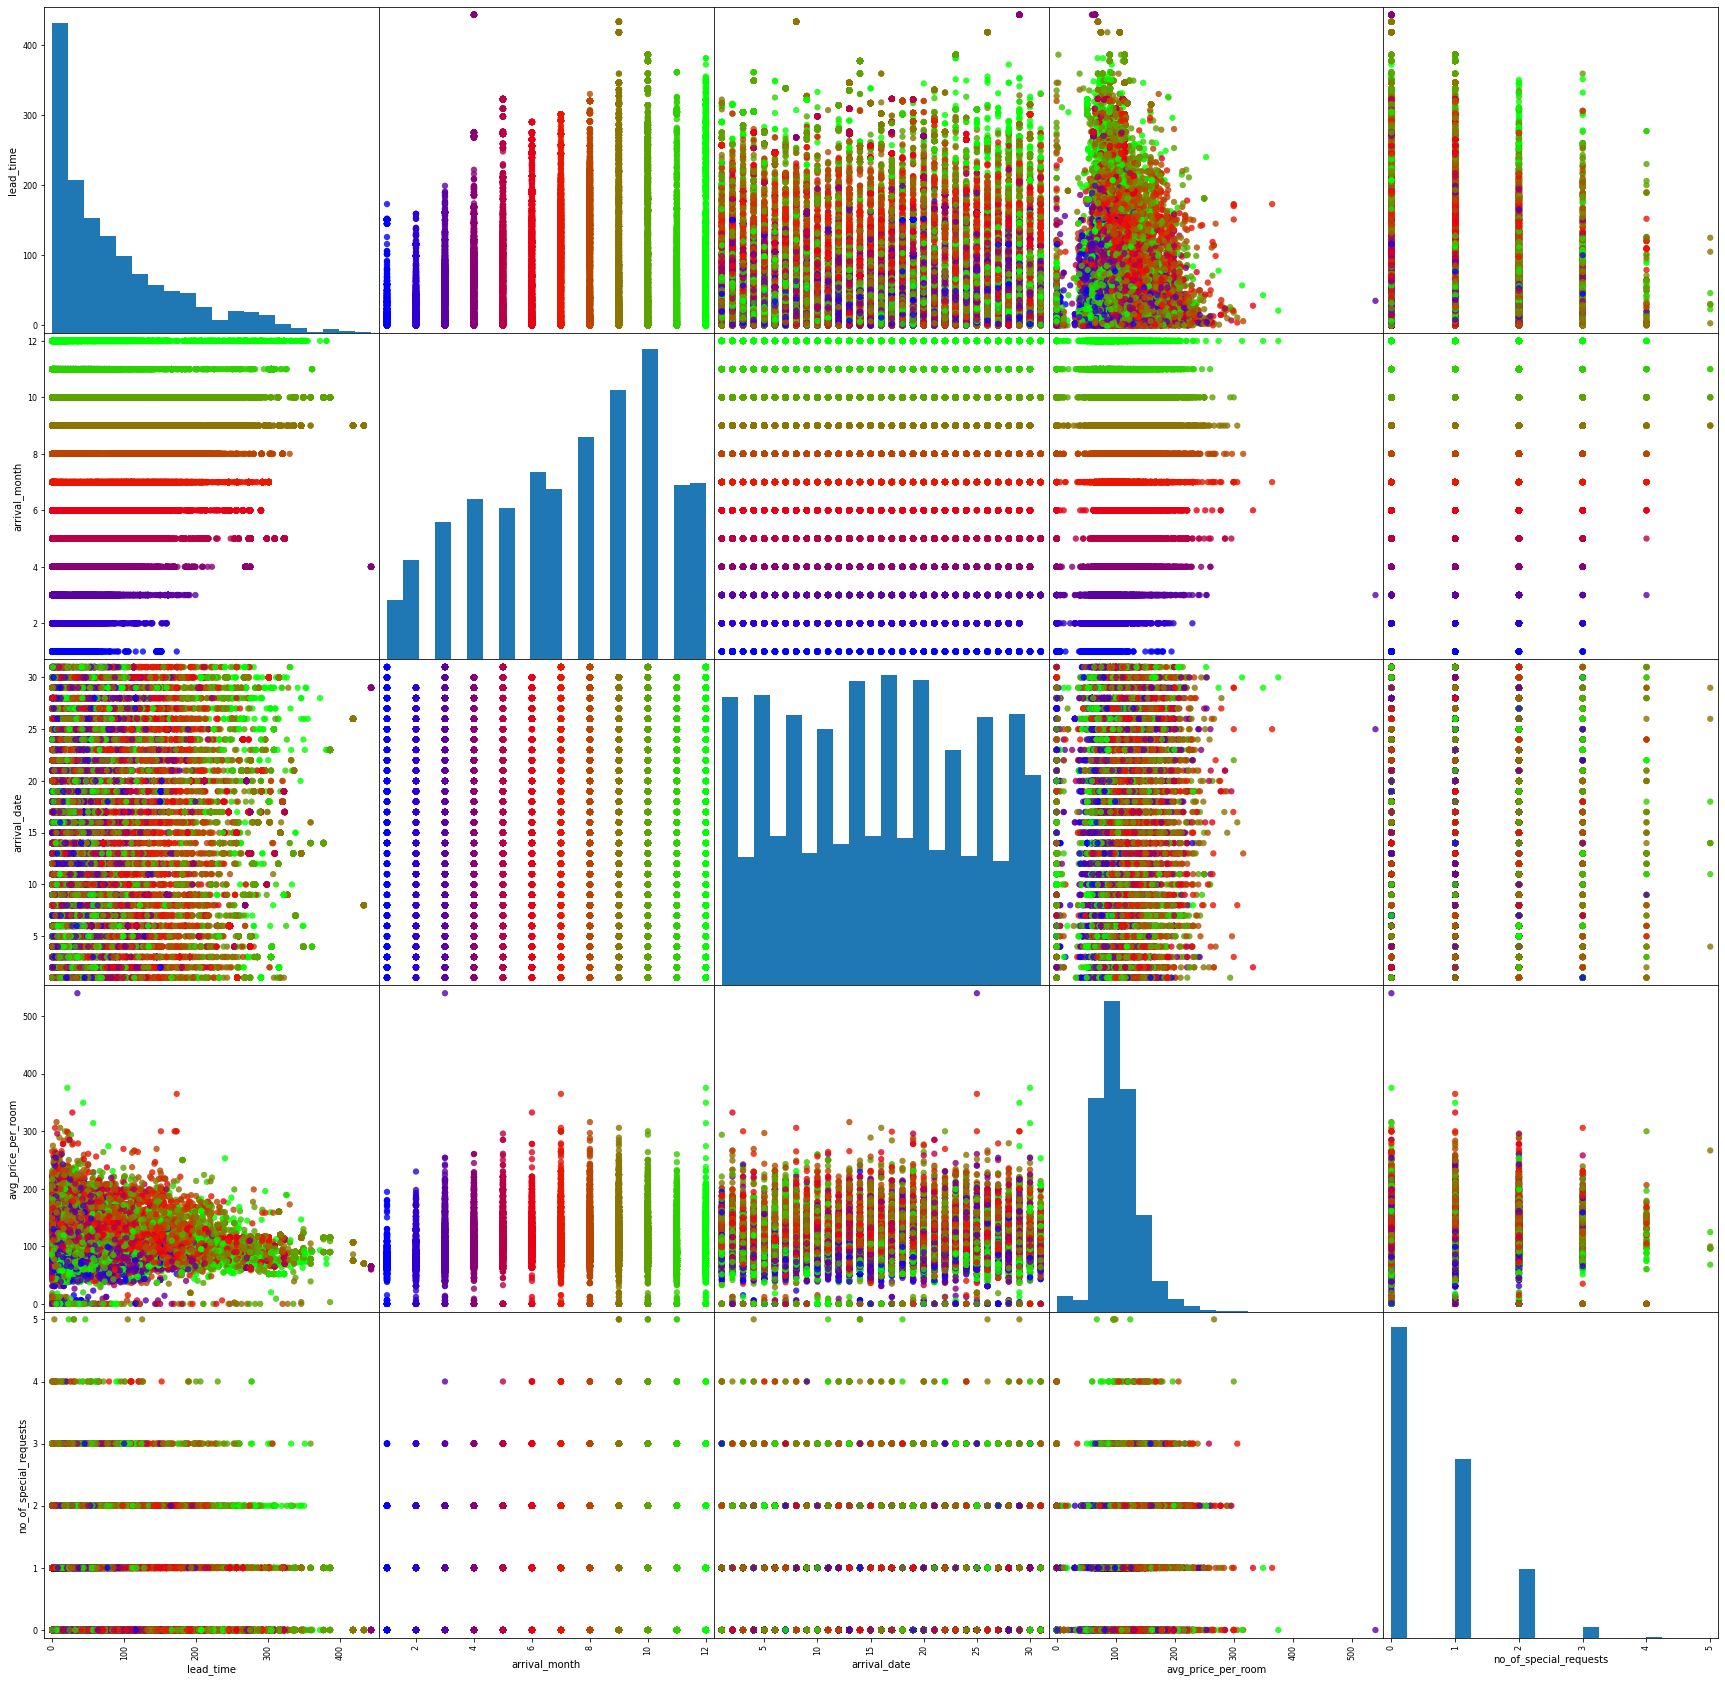

In [ ]:
pd.plotting.scatter_matrix(data_encoded[Selected_feat_RF_train], c = data_encoded["arrival_month"], figsize=(30, 30),marker='o', hist_kwds={'bins': 20}, s=40,alpha=.8, cmap=plt.cm.brg, label=list(Selected_feat_RF_train))
plt.show()


##Mutual info classifier Feature selection

type_of_meal_plan                       0.001756
room_type_reserved                      0.000000
market_segment_type                     0.008734
no_of_adults                            0.005600
no_of_children                          0.004896
no_of_weekend_nights                    0.001955
no_of_week_nights                       0.004758
required_car_parking_space              0.004242
lead_time                               0.134177
arrival_year                            0.022555
arrival_month                           0.022295
arrival_date                            0.000000
repeated_guest                          0.009258
no_of_previous_cancellations            0.001654
no_of_previous_bookings_not_canceled    0.009611
avg_price_per_room                      0.088317
no_of_special_requests                  0.037015
dtype: float64


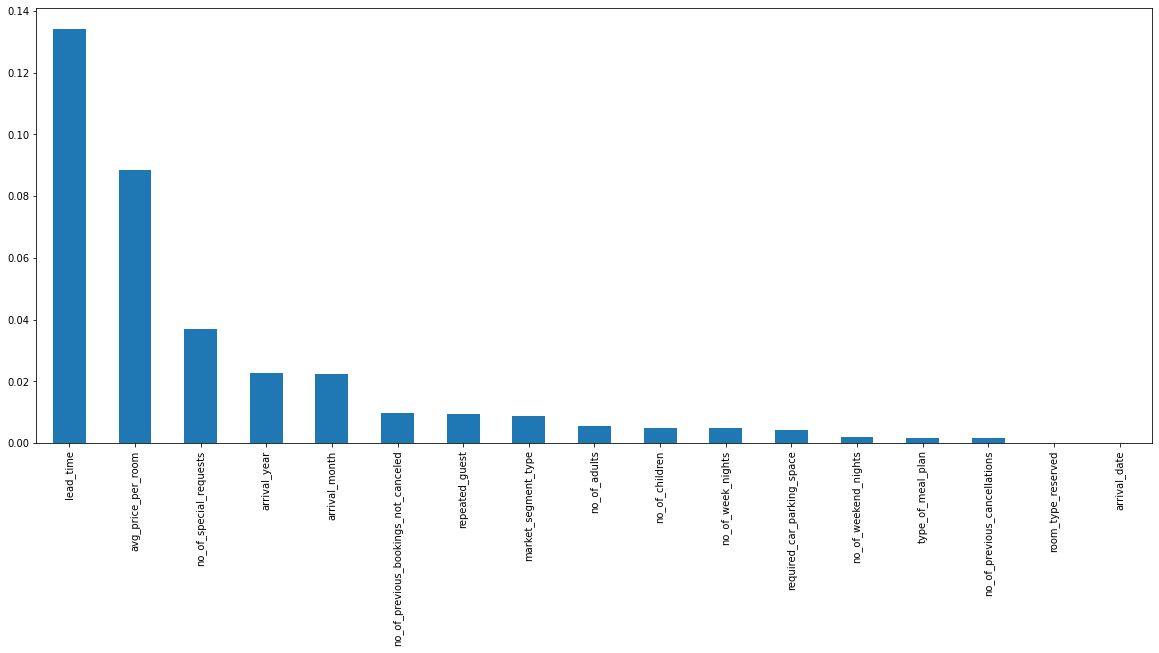

In [ ]:
#mutual info feat select training set
mut_info = mutual_info_classif(X_train,y_train)
mut_pd = pd.Series(mut_info)
mut_pd.index = X_train.columns
mut_pd.sort_values(ascending = True)
print(mut_pd)
mut_pd.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#adds best feature in a list
Selected_feat_MInfo_ = [ "lead_time",  "avg_price_per_room","no_of_special_requests","arrival_month","arrival_year" ]


###Mutual info scatter matrix plot of selected features

Create a scatter matrix plot of the mutual info features.

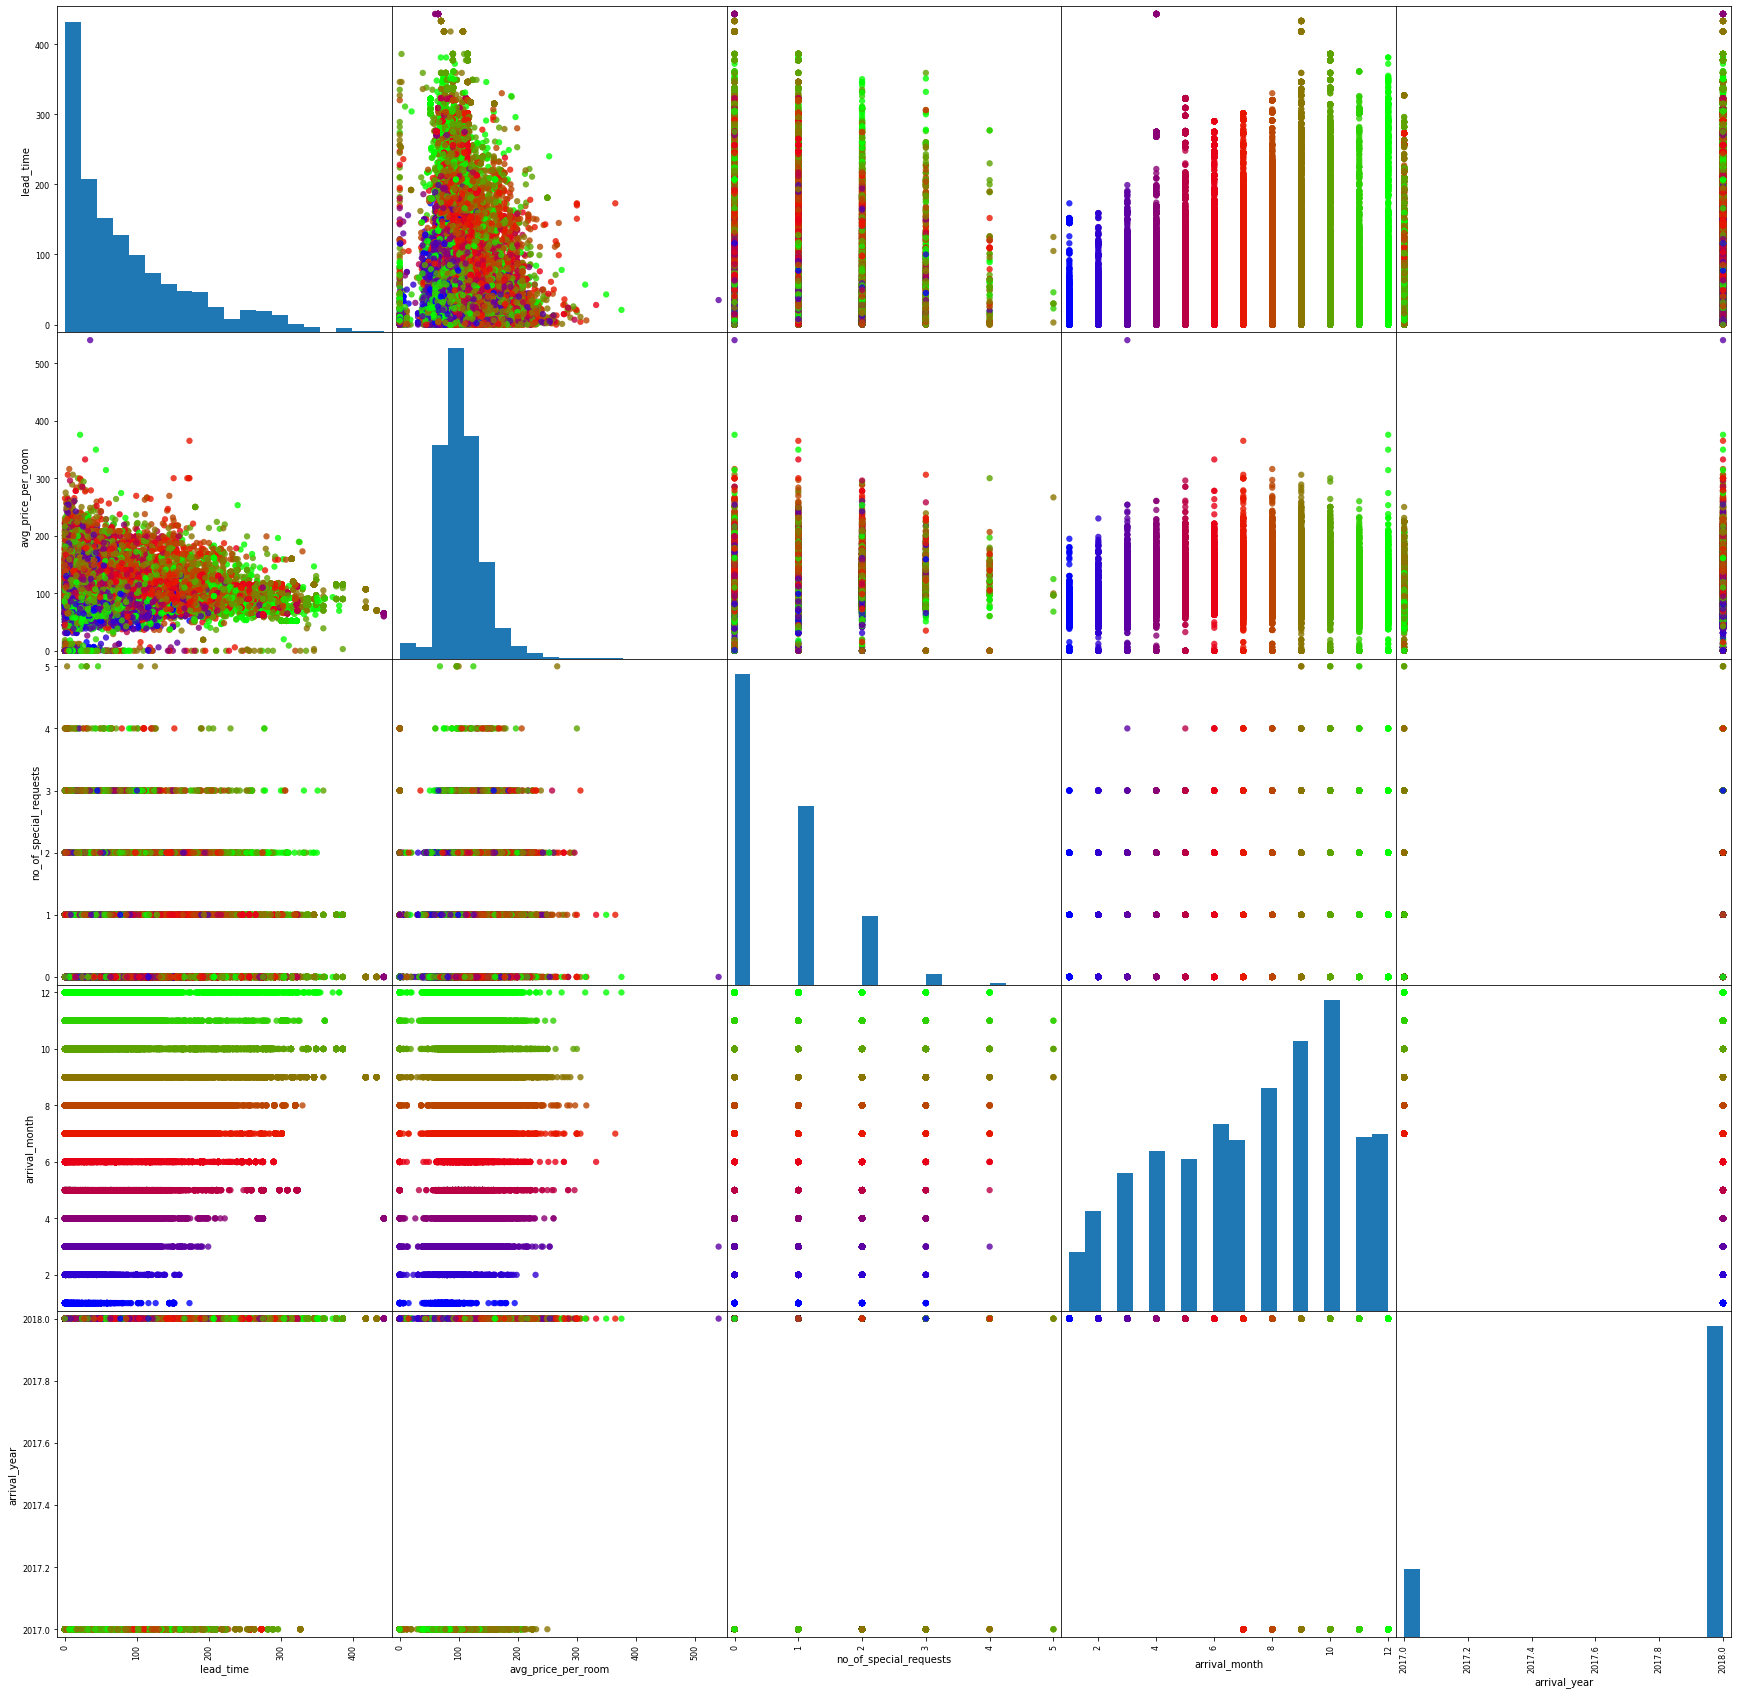

In [ ]:
pd.plotting.scatter_matrix(data_encoded[Selected_feat_MInfo_], c = data_encoded["arrival_month"], figsize=(30, 30),marker='o', hist_kwds={'bins': 20}, s=40,alpha=.8, cmap=plt.cm.brg, label=list(Selected_feat_MInfo_))
plt.show()


Thus the following features were chosen from each method:

chi2:


*   lead_time
*   repeated_guest
*   no_of_previous_bookings_not_canceled
*   avg_price_per_room
*   no_of_special_requests

Randomforest:  

*   lead_time
*   arrival_month
*   arrival_date
*   avg_price_per_room
*   no_of_special_requests



Mutual info classifier:  

*   lead_time
*   avg_price_per_room
*   no_of_special_requests
*   arrival_month
*   arrival_year


From this we can see that **lead_time, avg_price_per_room and no_of_special_requests were all present in each selection.**



# Train Random Forest Classifier with selected features

We train the Randomforest classifier using each of sets the selected features.

##**Train with CHI2 selected features**

In [ ]:

#Define and trains a random forest using chi2 features
model = RandomForestClassifier()
model.fit(X_train[Selected_feat_chi2], y_train)
pred = model.predict(X_test[Selected_feat_chi2])
print(classification_report(y_test, pred, target_names = LE.classes_))
#plots what was deemed most important by the randomforest classifier
plot = barplot(model.feature_importances_, x=model.feature_importances_, y = model.feature_names_in_)
plot.set_title("Feature importances")
for value in plot.containers:
    plot.bar_label(value, padding=2)

              precision    recall  f1-score   support

    Canceled       0.80      0.73      0.76      3619
Not_Canceled       0.87      0.91      0.89      7264

    accuracy                           0.85     10883
   macro avg       0.84      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883



AttributeError: ignored

##**Train with RF selected features**

In [ ]:
#Define and trains a random forest using Randomforest features

model = RandomForestClassifier()
model.fit(X_train[Selected_feat_RF_train], y_train)
pred = model.predict(X_test[Selected_feat_RF_train])
print(classification_report(y_test, pred, target_names = LE.classes_))
#plots what was deemed most important by the randomforest classifier
plot = barplot(model.feature_importances_, x=model.feature_importances_, y = model.feature_names_in_)
plot.set_title("Feature importances")
for value in plot.containers:
    plot.bar_label(value, padding=2)

##**Train with Mutual Info selected features**

In [ ]:
#Define and trains a random forest using mutual info features

model = RandomForestClassifier()
model.fit(X_train[Selected_feat_MInfo_], y_train)
pred = model.predict(X_test[Selected_feat_MInfo_])
print(classification_report(y_test, pred, target_names = LE.classes_))
#plots what was deemed most important by the randomforest classifier
plot = barplot(model.feature_importances_, x=model.feature_importances_, y = model.feature_names_in_)
plot.set_title("Feature importances")
for value in plot.containers:
    plot.bar_label(value, padding=2)

It seems like the RF classifier performs best with the RF selected features

# Can we improve the recall and precision?

**Try different values of tree amounts and Max Features**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
K = range(50, 500, 50) #range of "K" nearest neighbours
recall = []
precision = []
#Calculate recall and precision for different values for amount of trees
for kk in K:
    Selected_feat_RF_train = ["lead_time", "arrival_month", "arrival_date", "avg_price_per_room", "no_of_special_requests"]
    model = RandomForestClassifier(kk)
    model.fit(X_train[Selected_feat_RF_train], y_train)
    pred_test = model.predict(X_test[Selected_feat_RF_train])
    recall.append(recall_score(pred_test,y_test)) #store validation set recall
    precision.append(precision_score(pred_test,y_test)) #Store validation set precision

L = range(1,20, 2)
recall2 = []
precision2 = []
#Calculate recall and precision for different values of Max Features
for ll in L:
    Selected_feat_RF_train = ["lead_time", "arrival_month", "arrival_date", "avg_price_per_room", "no_of_special_requests"]
    model = RandomForestClassifier(max_features=ll)
    model.fit(X_train[Selected_feat_RF_train], y_train)
    pred_test = model.predict(X_test[Selected_feat_RF_train])
    recall2.append(recall_score(pred_test,y_test)) #store validation set recall
    precision2.append(precision_score(pred_test,y_test)) #store validation set precision

#plotting of graphs
fig, ax = plt.subplots()
plt.plot(K, recall)
plt.plot(K, precision)
plt.xlabel('Amount of trees')
plt.ylabel('Score magnitude')
plt.legend(['Recall','Precision'])
plt.grid()
plt.show()

plt.plot(L, recall2)
plt.plot(L, precision2)
plt.xlabel('Max Features')
plt.ylabel('Score magnitude')
plt.legend(['Recall','Precision'])
plt.grid()
plt.show()

**Try different values of Max Depth**

In [ ]:
L = range(1,30, 2)
recall = []
precision = []
#Calculate recall and precision for different values of Max Depth
for ll in L:
    Selected_feat_RF_train = ["lead_time", "arrival_month", "arrival_date", "avg_price_per_room", "no_of_special_requests"]
    model = RandomForestClassifier(max_depth=ll)
    model.fit(X_train[Selected_feat_RF_train], y_train)
    pred_test = model.predict(X_test[Selected_feat_RF_train])
    recall.append(recall_score(pred_test,y_test)) #store validation set recall
    precision.append(precision_score(pred_test,y_test)) #store validation set precision

#plotting of training and testing accuracy graphs
fig, ax = plt.subplots()
plt.plot(L, recall)
plt.plot(L, precision)
plt.xlabel('Max Depth')
plt.ylabel('Score magnitude')
plt.legend(['Recall','precision'])
plt.grid()
plt.show()

Similar graphs and tests have been done for other parameters in the random forest classifier, and they have shown similar results. It does not seem like we can acheive a significantly higher value of the recall and precision when just tweaking the parameters.

# Final Evaluation

In [ ]:
#Define and trains a random forest using Randomforest features

model = RandomForestClassifier()
model.fit(X_train[Selected_feat_RF_train], y_train)
pred_test = model.predict(X_test[Selected_feat_RF_train])
print("Classification report test set")
print(classification_report(y_test, pred_test, target_names = LE.classes_))


#Code from lab 3:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    """taken from https://gist.github.com/zachguo/10296432"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth

    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t\p" + (columnwidth-3)//2 * " "

    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES

    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")

    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()


from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
confusion_test = confusion_matrix(y_test, pred_test)


#Print the confusion matrices
print("Confusion test set:")
print_cm(confusion_test, LE.classes_)



From this we can see that we got a pretty decent result. We can also see that we have a higher recall and precision on the "Not canceled" class than on the "Canceled" class. In other words it seems like it was easier to predict which guests will not cancel their reservation rather than prediction which guests will cancel the reservations. We can also see that Canceled were more often confused for Not canceled than the other way around.